# Exploratory Data Analysis

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Problem definition

This analysis aims to explore how different factors — such as location, room type, and host activity — influence Airbnb rental prices in New York City in 2019.

### We import the data and create the Dataframe

In [68]:
df = pd.read_csv("/workspaces/josefina-aispuro-merelles-machine-learning/data/raw/internal-link.csv")
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


### Descriptive analysis

In [69]:
# Check the dimensions
df.shape

(48895, 16)

In [70]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [71]:
# Generate a statistical summary of numerical columns and transpose it for readability
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


### Observations
- There are 48895 rows and 16 columns.
- Most columns have very few missing values, except for the last_review and reviews_per_month columns, which both have around 10000 missing values.
- The data contains 10 numerical features and 6 categorical features.


### Data cleaning

In [72]:
# Looking for duplicated data
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Length: 48895, dtype: bool

### Observations
No duplicated rows were found in the dataset. If any duplicates were present, they would have been removed.

In [73]:
# Dropping columns with many missing values that are not relevant to price analysis
df.drop(["last_review", "reviews_per_month"], axis=1, inplace=True)
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2


In [74]:
# Dropping irrelevant information
df.drop(["id", "name", "host_id", "host_name"], axis = 1, inplace = True)

In [75]:
df.drop(["neighbourhood"], axis = 1, inplace = True)
df

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,40.67853,-73.94995,Private room,70,2,0,2,9
48891,Brooklyn,40.70184,-73.93317,Private room,40,4,0,2,36
48892,Manhattan,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48893,Manhattan,40.75751,-73.99112,Shared room,55,1,0,6,2


### Observations
- Non-informative columns such as id, name, host_id, and host_name were removed, as they do not contribute to the price analysis.
- Since we already have numerical coordinates (latitude and longitude) and neighbourhood_group, the neighbourhood column is redundant and has been removed to simplify the dataset.

### Visualization (univariate)

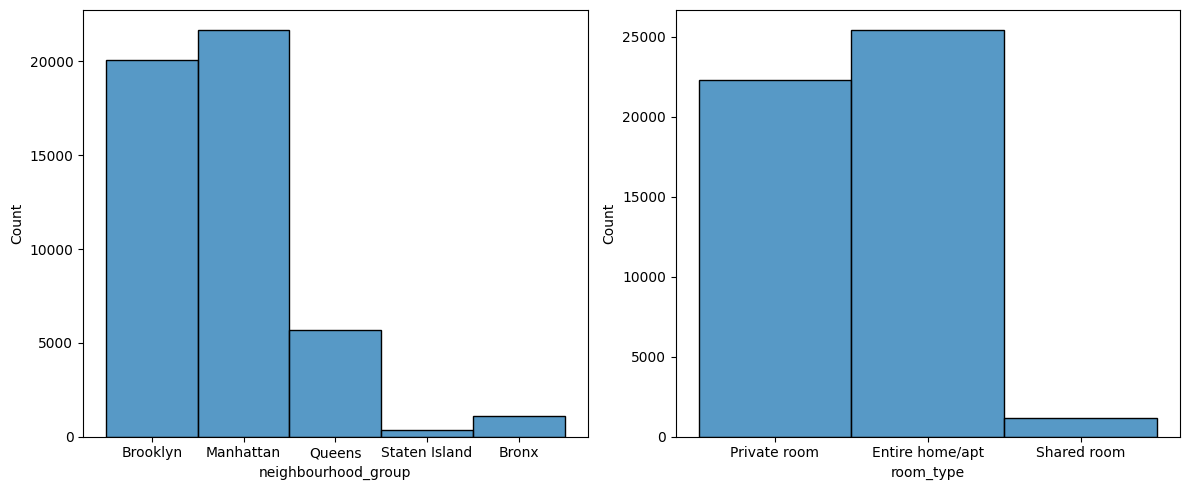

In [76]:
# Visualization of categorical features
fig, axis = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(ax = axis[0], data = df, x = "neighbourhood_group").set(ylabel = "Count")
sns.histplot(ax = axis[1], data = df, x = "room_type").set(ylabel = "Count")

plt.tight_layout()
plt.show()

### Observations


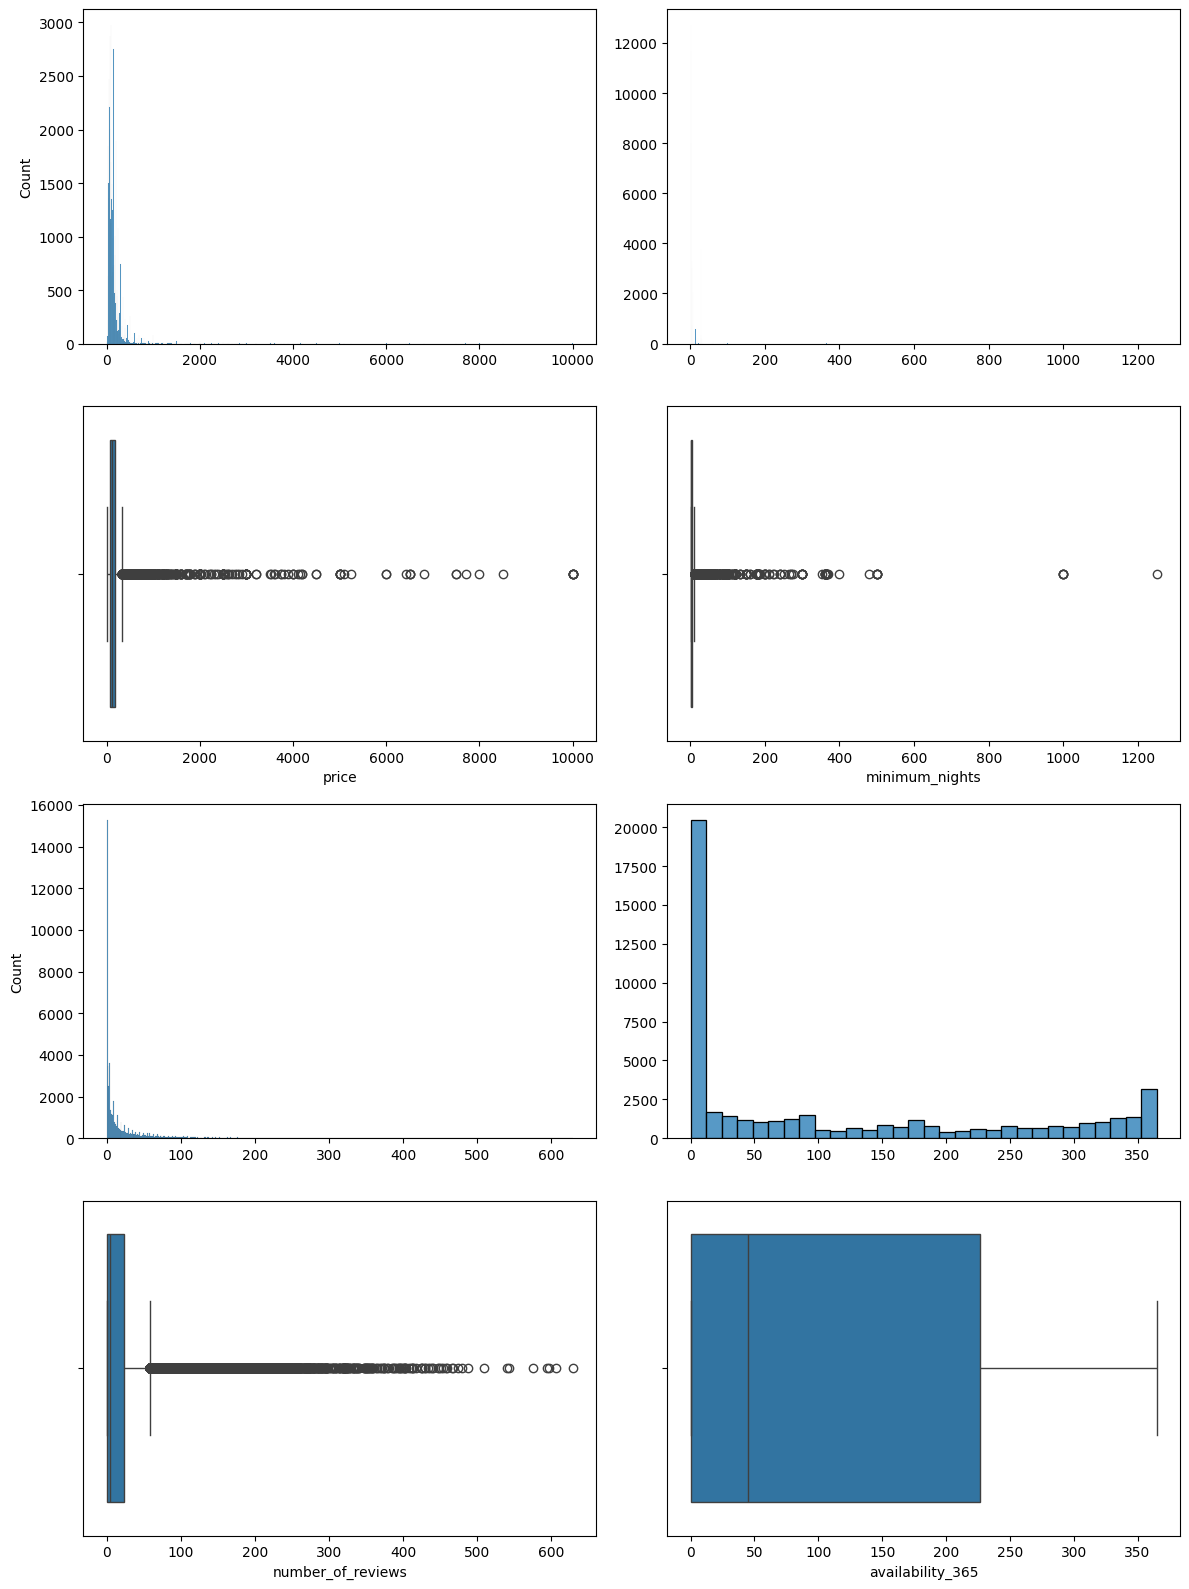

In [77]:
# Visualization of numerical features
fig, axis = plt.subplots(4, 2, figsize = (12, 16))

# Creating a multiple-plot figure with histograms and boxplots
sns.histplot(ax = axis[0,0], data = df, x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1,0], data = df, x = "price")

sns.histplot(ax = axis[0,1], data = df, x = "minimum_nights").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1,1], data = df, x = "minimum_nights")

sns.histplot(ax = axis[2,0], data = df, x = "number_of_reviews").set(xlabel = None)
sns.boxplot(ax = axis[3,0], data = df, x = "number_of_reviews")

sns.histplot(ax = axis[2,1], data = df, x = "availability_365").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3,1], data = df, x = "availability_365")

plt.tight_layout()
plt.show()

### Observations


### Visualization (multivariate)

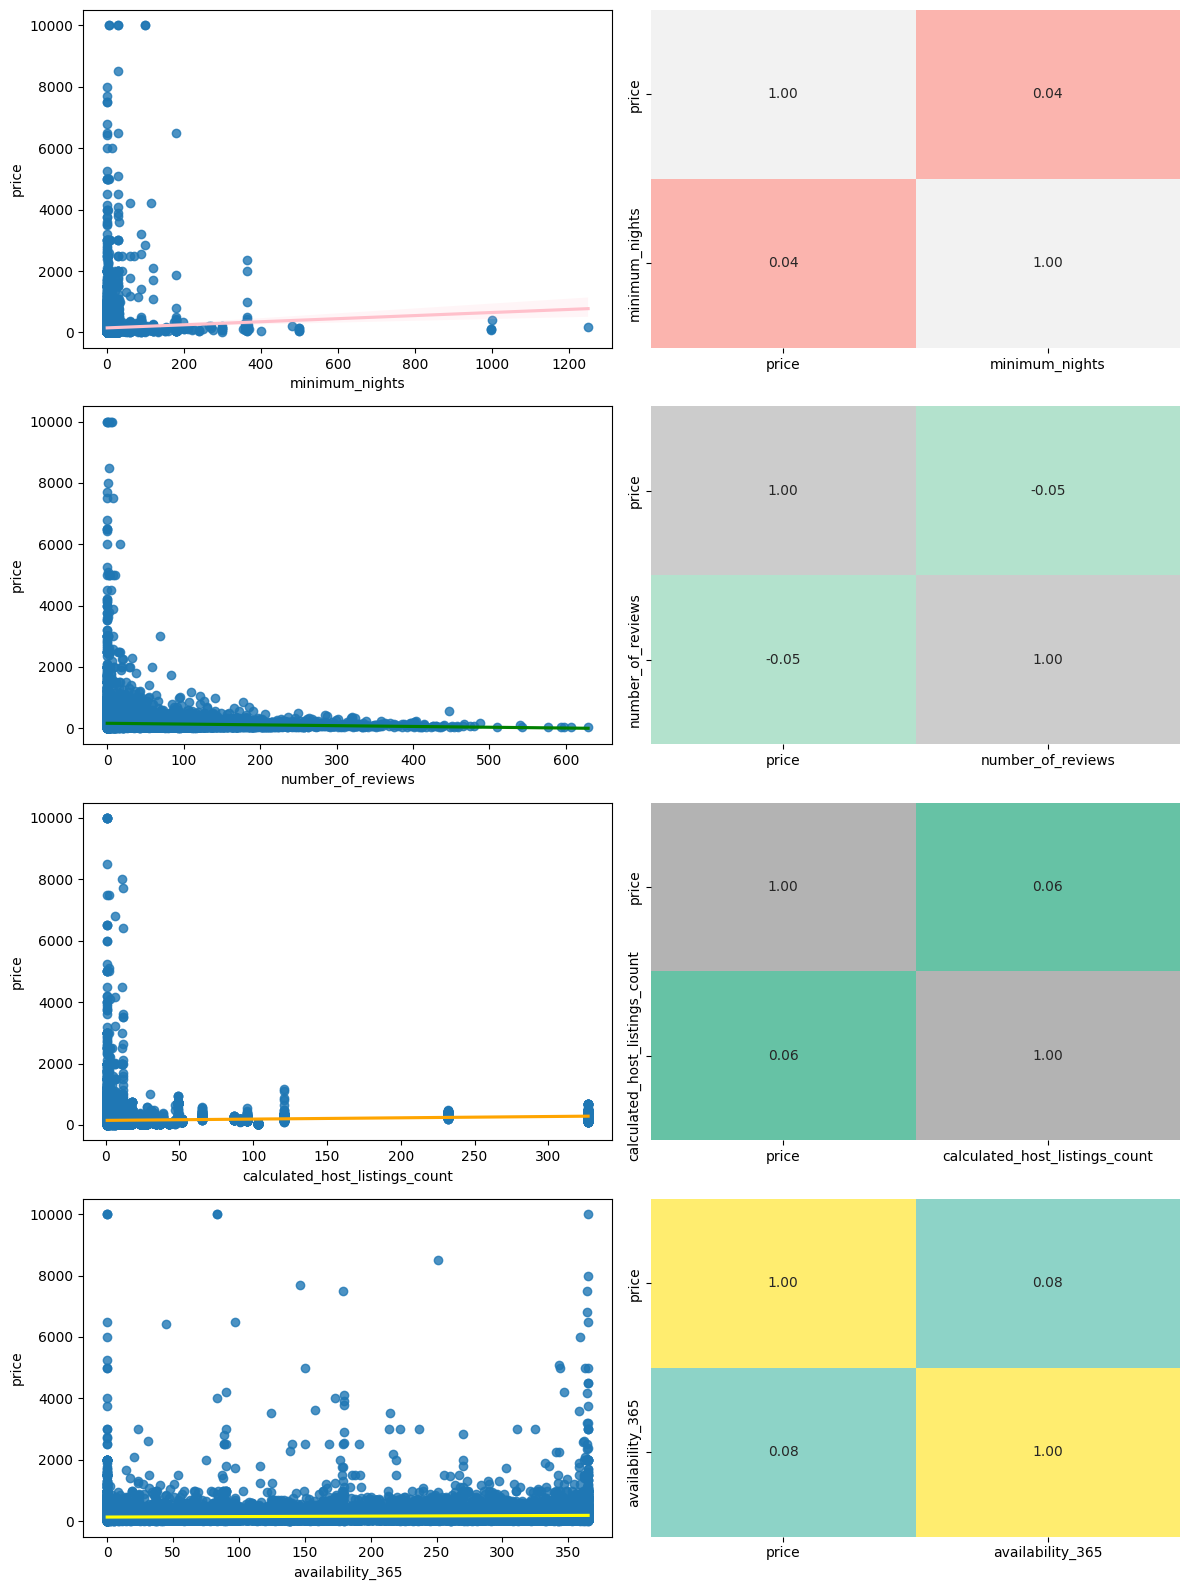

In [78]:
# Numerical correlations
corr_price_minimum = df[["price", "minimum_nights"]].corr()
corr_price_reviews = df[["price", "number_of_reviews"]].corr()
corr_price_listings = df[["price", "calculated_host_listings_count"]].corr()
corr_price_availability = df[["price", "availability_365"]].corr()

# Create a 4x2 figure for scatterplots and heatmaps
fig, axis = plt.subplots(4, 2, figsize=(12, 16))

# Scatterplots and regression lines
sns.regplot(ax = axis[0, 0], data = df, x = "minimum_nights", y = "price", line_kws = {"color": "pink"})
sns.heatmap(ax = axis[0, 1], data = corr_price_minimum, annot = True, fmt = ".2f", cbar = False, cmap = "Pastel1")

sns.regplot(ax = axis[1, 0], data = df, x = "number_of_reviews", y = "price", line_kws = {"color": "green"})
sns.heatmap(ax = axis[1, 1], data = corr_price_reviews, annot = True, fmt = ".2f", cbar = False, cmap = "Pastel2")

sns.regplot(ax = axis[2, 0], data = df, x = "calculated_host_listings_count", y = "price", line_kws = {"color": "orange"})
sns.heatmap(ax = axis[2, 1], data = corr_price_listings, annot = True, fmt = ".2f", cbar = False, cmap = "Set2")

sns.regplot(ax = axis[3, 0], data = df, x = "availability_365", y = "price", line_kws = {"color": "yellow"})
sns.heatmap(ax = axis[3, 1], data = corr_price_availability, annot = True, fmt = ".2f", cbar = False, cmap = "Set3")

plt.tight_layout()
plt.show()

### Observations


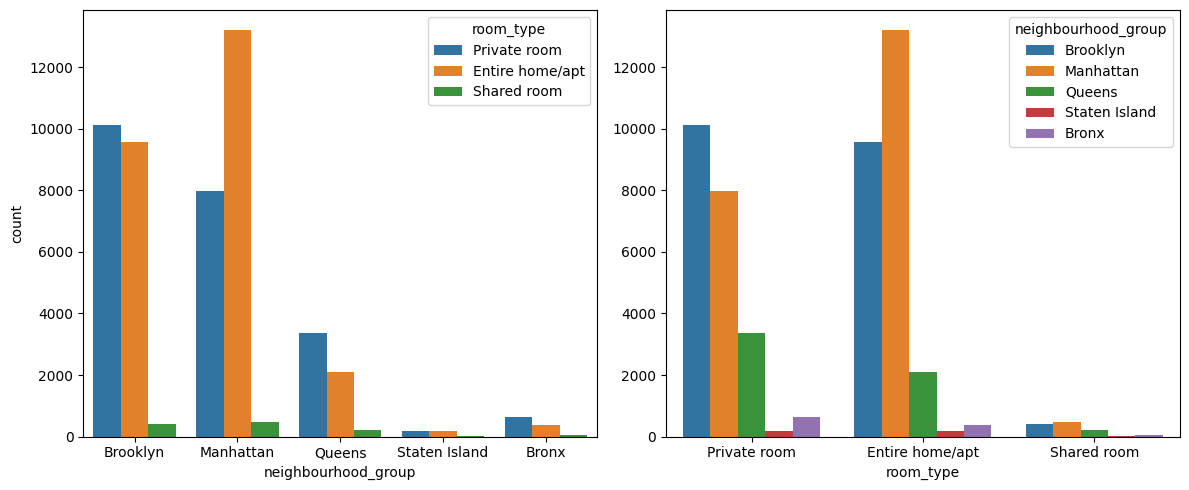

In [79]:
# Categorical correlations
fig, axis = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(ax = axis[0], data = df, x = "neighbourhood_group", hue = "room_type")
sns.countplot(ax = axis[1], data = df, x = "room_type", hue = "neighbourhood_group").set(ylabel = None)

plt.tight_layout()
plt.show()

### Observations
